# Ejemplo

In [9]:
pip install pymc3

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install arviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [13]:
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
x = [
   -1.64934805,  0.52925273,  1.10100092,  0.38566793, -1.56768245,
    1.26195686,  0.92613986, -0.23942803,  0.33933045,  1.14390657,
    0.65466195, -1.36229805, -0.32393554, -0.23258941,  0.17688024,
    1.60774334, -0.22801156,  1.53008133, -1.31431042, -0.27699609
] # inputs
y = [
   -3.67385666,  3.37543275,  6.25390538,  1.41569973, -2.08413872,
    6.71560158,  6.32344159,  2.40651236,  4.54217349,  6.25778739,
    4.98933806, -2.69713137,  1.45705571, -0.49772953,  1.50502898,
    7.27228263,  1.6267433 ,  6.43580518, -0.50291509,  0.65674682
] # outputs

In [21]:
#Visualización de los datos

with pm.Model() as model:
    # definir priors
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predicciones
    obs = pm.Normal('observation', a*x + b, s, observed=y)
    
    # usa MCMC para el muestreo
    trace = pm.sample()

C:\Users\cruz_\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [error, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 73 seconds.


AttributeError: module 'pymc3' has no attribute 'plot_posterior'

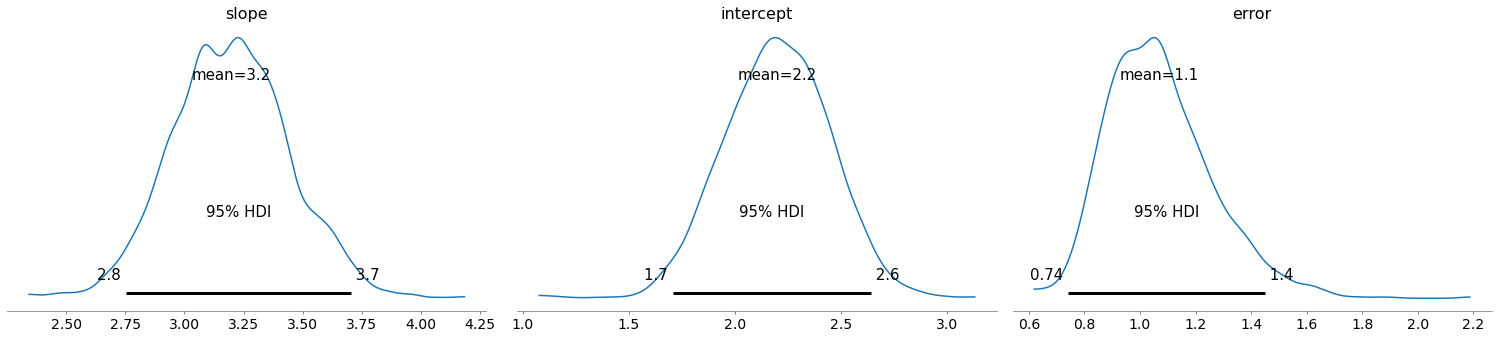

In [26]:
az.rcParams['stats.hdi_prob'] = 0.95
with model:
    az.plot_posterior(trace)

In [3]:
#modelo predictivo

with pm.Model() as predictive_model:
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    x_ = pm.Data('features', x) # almacenador de datos
    
    obs = pm.Normal('observation', a*x_ + b, s, observed=y)
    
    trace = pm.sample()

C:\Users\cruz_\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\cruz_\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [error, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 69 seconds.


In [16]:
x_new = np.linspace(-3, 3, 50) # 50 input values between -3 and 3
with predictive_model:
    pm.set_data({'features': x_new})
    posterior = pm.sample_posterior_predictive(trace)

In [18]:
y_pred = posterior['observation']

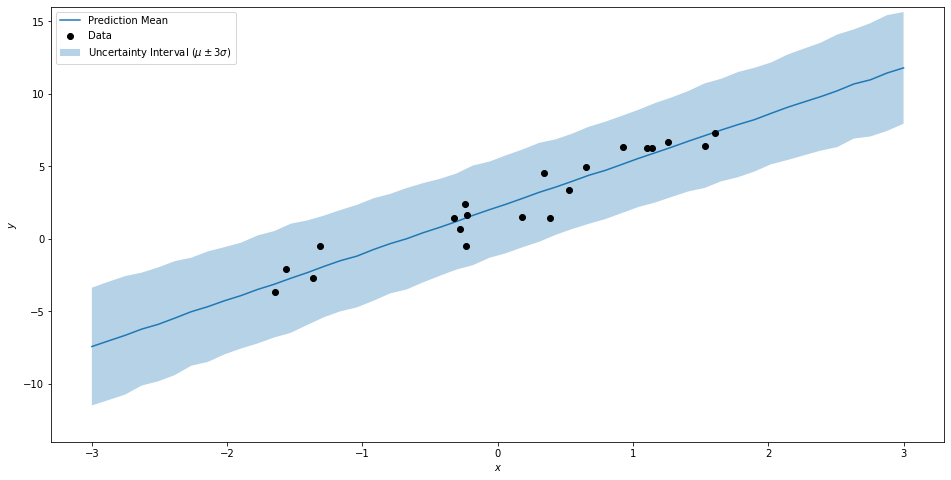

In [20]:
#graficando

y_mean = y_pred.mean(axis=0)
y_std = y_pred.std(axis=0)
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='k', zorder=10, label='Data')
plt.plot(x_new, y_mean, label='Prediction Mean')
plt.fill_between(x_new, y_mean - 3*y_std, y_mean + 3*y_std, alpha=0.33, label='Uncertainty Interval ($\mu\pm3\sigma$)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-14, 16)
plt.legend(loc='upper left')